In [1]:
import pandas as pd
file = './data/MOE_GRID_1078.xlsx'
df = pd.read_excel(open(file, "rb"))

rd = {"DESCRIPTOR" : "GRID_DESCRIPTOR"}
df.rename(columns = rd, inplace=True)

for v in df.columns:
    print("\""+v+"\"")


"Unnamed: 0"
"Unnamed: 0.1"
"UNIQUEID"
"SMILE"
"SETID"
"GRID_DESCRIPTOR"
"LOGD"
"mol"
"AM1_dipole"
"AM1_E"
"AM1_Eele"
"AM1_HF"
"AM1_HOMO"
"AM1_IP"
"AM1_LUMO"
"apol"
"ASA"
"ASA+"
"ASA-"
"ASA_H"
"ASA_P"
"ast_fraglike"
"ast_fraglike_ext"
"ast_violation"
"ast_violation_ext"
"a_acc"
"a_acid"
"a_aro"
"a_base"
"a_count"
"a_don"
"a_donacc"
"a_heavy"
"a_hyd"
"a_IC"
"a_ICM"
"a_nB"
"a_nBr"
"a_nC"
"a_nCl"
"a_nF"
"a_nH"
"a_nI"
"a_nN"
"a_nO"
"a_nP"
"a_nS"
"balabanJ"
"BCUT_PEOE_0"
"BCUT_PEOE_1"
"BCUT_PEOE_2"
"BCUT_PEOE_3"
"BCUT_SLOGP_0"
"BCUT_SLOGP_1"
"BCUT_SLOGP_2"
"BCUT_SLOGP_3"
"BCUT_SMR_0"
"BCUT_SMR_1"
"BCUT_SMR_2"
"BCUT_SMR_3"
"bpol"
"b_1rotN"
"b_1rotR"
"b_ar"
"b_count"
"b_double"
"b_heavy"
"b_max1len"
"b_rotN"
"b_rotR"
"b_single"
"b_triple"
"CASA+"
"CASA-"
"chi0"
"chi0v"
"chi0v_C"
"chi0_C"
"chi1"
"chi1v"
"chi1v_C"
"chi1_C"
"chiral"
"chiral_u"
"DASA"
"DCASA"
"dens"
"density"
"diameter"
"dipole"
"dipoleX"
"dipoleY"
"dipoleZ"
"E"
"E_ang"
"E_ele"
"E_nb"
"E_oop"
"E_rele"
"E_rnb"
"E_rsol"
"E_rvdw"
"E

In [2]:
import numpy as np 
import string


list_of_desc = ["a_acc", \
                  "bpol", \
                  "b_double", \
                  "b_rotN", \
                  "b_rotR", \
                  "chi1_C", \
                  "diameter", \
                  "logP(o/w)", \
                  "logS", \
                  "PEOE_VSA+0", \
                  "PEOE_VSA+3", \
                  "PEOE_VSA-0", \
                  "PEOE_VSA-2", \
                  "PEOE_VSA-5", \
                  "PEOE_VSA_POS", \
                  "SlogP_VSA0", \
                  "SlogP_VSA1", \
                  "SlogP_VSA2", \
                  "SlogP_VSA3", \
                  "SlogP_VSA4", \
                  "SlogP_VSA8", \
                  "SMR_VSA1", \
                  "SMR_VSA6", \
                  "TPSA", \
                  "vsa_acc", \
                  "vsa_other", \
                  "vsa_pol", \
                  "weinerPol", \
                  "GRID_DESCRIPTOR"]

basicname = ["G", "M", "GM", \
             "GTr", "GTe", \
             "MTe", "MTr", \
             "GMTe", "GMTr"]

X = {}
Y = {}
setid = {}
uniqueid = {}

for bn in basicname:
    X[bn] = []
    Y[bn] = []
    setid[bn] = []
    uniqueid[bn] = []

for idx, ss in enumerate(df["UNIQUEID"]):
    
    fdesc = df[df["UNIQUEID"] == ss]
    
    xval = {}
    for bn in basicname:
        xval[bn] = []

    for d in list_of_desc:
        if d == "GRID_DESCRIPTOR":
            nvs = fdesc[d].values[0].split()
            xval["GM"].extend([float(nv) for nv in nvs])  
            xval["G"].extend([float(nv) for nv in nvs])  
            xval["GMTr"].extend([float(nv) for nv in nvs])  
            xval["GTr"].extend([float(nv) for nv in nvs])  
            xval["GMTe"].extend([float(nv) for nv in nvs])  
            xval["GTe"].extend([float(nv) for nv in nvs])  
        else:
            xval["GM"].append(fdesc[d].values[0])
            xval["M"].append(fdesc[d].values[0])
            xval["GMTr"].append(fdesc[d].values[0])
            xval["MTr"].append(fdesc[d].values[0])
            xval["GMTe"].append(fdesc[d].values[0])
            xval["MTe"].append(fdesc[d].values[0])
            
    y = df[df["UNIQUEID"] == ss]['LOGD'].values[0]
    sid = df[df["UNIQUEID"] == ss]['SETID'].values[0]
    uid = df[df["UNIQUEID"] == ss]['UNIQUEID'].values[0]
    
    for bn in ["GM", "G", "M"]:
        X[bn].append(xval[bn])
        Y[bn].append(y)
        setid[bn].append(sid)
        uniqueid[bn].append(uid)
        
    if (sid == "Tr"):
        for bn in ["GMTr", "GTr", "MTr"]:
            X[bn].append(xval[bn])
            Y[bn].append(y)
            setid[bn].append(sid)
            uniqueid[bn].append(uid)
    elif (sid == "Te"):
        for bn in ["GMTe", "GTe", "MTe"]:
            X[bn].append(xval[bn])
            Y[bn].append(y)
            setid[bn].append(sid)
            uniqueid[bn].append(uid)

for bn in basicname:
    print(bn, " : ")
    print("  ", np.asarray(Y[bn]).shape, np.asarray(X[bn]).shape )  

G  : 
   (1078,) (1078, 1879)
M  : 
   (1078,) (1078, 28)
GM  : 
   (1078,) (1078, 1907)
GTr  : 
   (865,) (865, 1879)
GTe  : 
   (213,) (213, 1879)
MTe  : 
   (213,) (213, 28)
MTr  : 
   (865,) (865, 28)
GMTe  : 
   (213,) (213, 1907)
GMTr  : 
   (865,) (865, 1907)


In [3]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import numpy as np
import matplotlib 
import math

###################################################################################

def absdiff (yc, ytlist):
    
    diff = []
    diffnoa = []
    for idx, v in enumerate(ytlist):
        d = math.fabs(v-yc[idx])
        diff.append(d)
        d = v-yc[idx]
        diffnoa.append(d)
            
    return np.average(diff), np.std(diff), np.std(diffnoa)

###################################################################################

def mainrunpls (X, Y, trname, tename, mcomp, cvval, maxcomp=27):
    
    print("Running GRID model using cv = %3d"%(cvval))
    
    trscores = []
    trncomps =[]
    trmses = []
    
    for trncomp in range(1,maxcomp+1):
            pls = PLSRegression(trncomp,scale=False)
            pls.fit(X[trname], Y[trname])
        
            y_cv = cross_val_predict(pls, X[trname], Y[trname], cv=cvval)
            trscore = r2_score(Y[trname], y_cv)
            trmse = mean_squared_error(Y[trname], y_cv)
        
            trscores.append(trscore)
            trmses.append(trmse)
            trncomps.append(trncomp)
            print("%4d %10.8f %10.8f"%(trncomp, trmse, trscore))
    
    msetrmin = np.argmin(trmses)
    
    plt.plot(trncomps, trscores, '-o', color='black')
    plt.xlabel('number of components tr')
    plt.ylabel('scores tr')
    plt.xticks(trncomps)
    plt.show()
    
    plt.plot(trncomps, trmses, '-o', color='black')
    plt.xlabel('number of components tr')
    plt.ylabel('MSE tr')
    plt.xticks(trncomps)
    plt.show()

    acomp = msetrmin+1
    print("Number of components selected automatically: ",  acomp)
    print("     Number of components selected manually: ",  mcomp)
        
    pls_auto = PLSRegression(acomp)
    pls_auto.fit(X[trname], Y[trname])
    y_auto_te = pls_auto.predict(X[tename])
    y_auto_tr = pls_auto.predict(X[trname])
    y_auto = np.concatenate((y_auto_te, y_auto_tr))
    y_auto_true = []
    y_auto_true.extend(Y[tename])
    y_auto_true.extend(Y[trname])
        
    avg, std, stdnoa = absdiff (y_auto_te, Y[tename])
    print("Auto model  TestSet %10.5f %10.5f %10.5f"%(avg, std, stdnoa))
    avg, std, stdnoa = absdiff (y_auto_tr, Y[trname])
    print("Auto model TrainSet %10.5f %10.5f %10.5f"%(avg, std, stdnoa))
    avg, std, stdnoa = absdiff (y_auto, y_auto_true)
    print("Auto model  FullSet %10.5f %10.5f %10.5f"%(avg, std, stdnoa))
        
    pls_manu = PLSRegression(mcomp)
    pls_manu.fit(X[trname], Y[trname])
    y_manu_te = pls_manu.predict(X[tename])
    y_manu_tr = pls_manu.predict(X[trname])
    y_manu = np.concatenate((y_manu_te, y_manu_tr))
    y_manu_true = []
    y_manu_true.extend(Y[tename])
    y_manu_true.extend(Y[trname])
        
    avg, std, stdnoa = absdiff (y_manu_te, Y[tename])
    print("Manual model  TestSet %10.5f %10.5f %10.5f"%(avg, std, stdnoa))
    avg, std, stdnoa = absdiff (y_manu_tr, Y[trname])
    print("Manual model TrainSet %10.5f %10.5f %10.5f"%(avg, std, stdnoa))
    avg, std, stdnoa = absdiff (y_manu, y_manu_true)
    print("Manual model  FullSet %10.5f %10.5f %10.5f"%(avg, std, stdnoa))


###################################################################################



Running GRID model using cv =  10
   1 2.31363434 0.33875886
   2 1.74215652 0.50208832
   3 1.43353429 0.59029314
   4 1.14107916 0.67387738
   5 0.97431758 0.72153816
   6 0.84295383 0.75908217
   7 0.77017468 0.77988260
   8 0.69435991 0.80155060
   9 0.65119669 0.81388673
  10 0.60500265 0.82708908
  11 0.60181175 0.82800104
  12 0.59852963 0.82893908
  13 0.59540643 0.82983170
  14 0.57619231 0.83532313
  15 0.56921299 0.83731783
  16 0.56558901 0.83835357
  17 0.56862133 0.83748693
  18 0.58196578 0.83367306
  19 0.57755457 0.83493379
  20 0.59599508 0.82966346


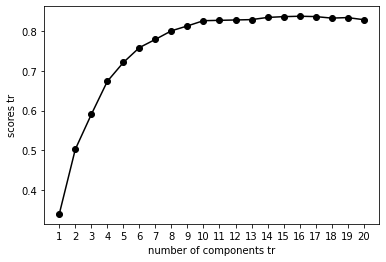

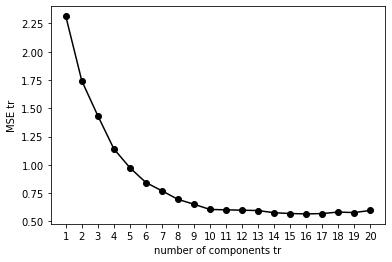

Number of components selected automatically:  16
     Number of components selected manually:  4
Auto model  TestSet    0.60698    0.52494    0.80150
Auto model TrainSet    0.00011    0.00009    0.00015
Auto model  FullSet    0.12002    0.33592    0.35663
Manual model  TestSet    0.62121    0.52913    0.81527
Manual model TrainSet    0.16188    0.13374    0.20998
Manual model  FullSet    0.25263    0.32113    0.40854


In [4]:
trname = "GTr"
tename = "GTe"
manualcomp = 4
cvlist = 10

mainrunpls (X, Y, trname, tename, manualcomp, cvlist, 20)

Running GRID model using cv =   5
   1 2.47850918 0.29163731
   2 1.82425350 0.47862484
   3 1.56380472 0.55306160
   4 1.28782589 0.63193688
   5 1.12616818 0.67813897
   6 0.96866391 0.72315399
   7 0.89886539 0.74310254
   8 0.80890612 0.76881307
   9 0.74549960 0.78693478
  10 0.72664592 0.79232320
  11 0.72626277 0.79243270
  12 0.71068416 0.79688510
  13 0.69566729 0.80117695
  14 0.68632246 0.80384772
  15 0.67424708 0.80729889
  16 0.67696268 0.80652277
  17 0.68307345 0.80477629
  18 0.68265088 0.80489707
  19 0.69602316 0.80107524
  20 0.71435380 0.79583631


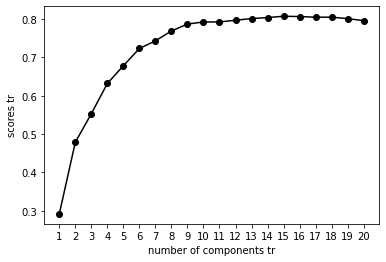

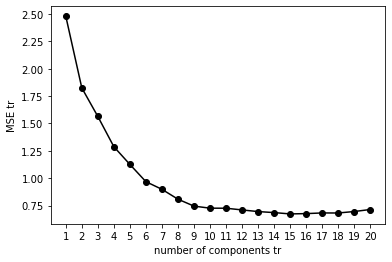

Number of components selected automatically:  15
     Number of components selected manually:  4
Auto model  TestSet    0.60699    0.52495    0.80152
Auto model TrainSet    0.00022    0.00017    0.00028
Auto model  FullSet    0.12011    0.33589    0.35663
Manual model  TestSet    0.62121    0.52913    0.81527
Manual model TrainSet    0.16188    0.13374    0.20998
Manual model  FullSet    0.25263    0.32113    0.40854


In [5]:
trname = "GTr"
tename = "GTe"
manualcomp = 4
cvlist = 5

mainrunpls (X, Y, trname, tename, manualcomp, cvlist, 20)

Running GRID model using cv =  10
   1 3.35335850 0.04160369
   2 2.57608270 0.26375061
   3 1.87210311 0.46494933
   4 1.58034359 0.54833476
   5 1.52909704 0.56298112
   6 1.46264026 0.58197460
   7 1.39031124 0.60264637
   8 1.35446811 0.61289041
   9 1.27407124 0.63586799
  10 1.18427275 0.66153257
  11 1.14023430 0.67411885
  12 1.07554565 0.69260698
  13 0.97686890 0.72080899
  14 0.92609582 0.73532003
  15 0.88401752 0.74734609
  16 0.83250359 0.76206887
  17 0.75615900 0.78388830
  18 0.67972297 0.80573387
  19 0.65932093 0.81156481
  20 0.62670080 0.82088771
  21 0.61634337 0.82384788
  22 0.60869952 0.82603251
  23 0.60730157 0.82643204
  24 0.60103109 0.82822416
  25 0.60112057 0.82819858
  26 0.60081603 0.82828562
  27 0.60113313 0.82819499


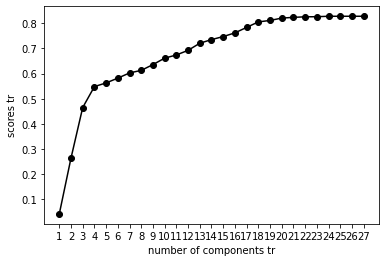

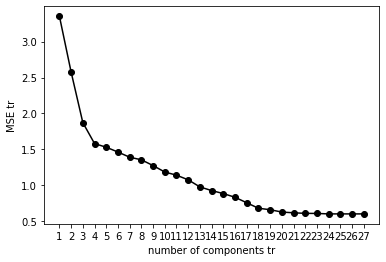

Number of components selected automatically:  26
     Number of components selected manually:  4
Auto model  TestSet    0.59822    0.42818    0.73562
Auto model TrainSet    0.55526    0.40042    0.68458
Auto model  FullSet    0.56375    0.40642    0.69497
Manual model  TestSet    0.77620    0.58339    0.97099
Manual model TrainSet    0.72055    0.55693    0.91069
Manual model  FullSet    0.73154    0.56269    0.92292


In [6]:
trname = "MTr"
tename = "MTe"
manualcomp = 4
cvlist = 10

mainrunpls (X, Y, trname, tename, manualcomp, cvlist, 27)

Running GRID model using cv =   5
   1 3.58264080 -0.02392563
   2 2.78241564 0.20478026
   3 2.04314628 0.41606486
   4 1.80051164 0.48541031
   5 1.66576318 0.52392168
   6 1.59332018 0.54462603
   7 1.46710497 0.58069858
   8 1.43919899 0.58867416
   9 1.37886902 0.60591658
  10 1.26413984 0.63870640
  11 1.21545971 0.65261928
  12 1.15348026 0.67033312
  13 1.04715618 0.70072075
  14 1.00898138 0.71163118
  15 0.95684585 0.72653162
  16 0.86932428 0.75154545
  17 0.77876830 0.77742652
  18 0.71590338 0.79539344
  19 0.72479183 0.79285310
  20 0.70245266 0.79923768
  21 0.67271706 0.80773617
  22 0.66374553 0.81030025
  23 0.66381027 0.81028175
  24 0.65684365 0.81227282
  25 0.65558707 0.81263196
  26 0.65608598 0.81248936
  27 0.65313559 0.81333259


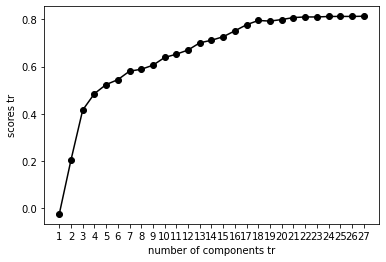

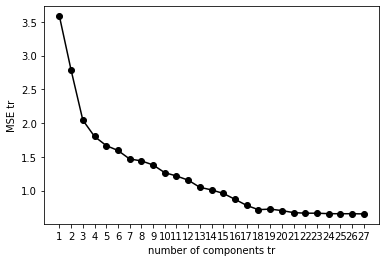

Number of components selected automatically:  27
     Number of components selected manually:  4
Auto model  TestSet    0.59823    0.42818    0.73562
Auto model TrainSet    0.55526    0.40042    0.68458
Auto model  FullSet    0.56375    0.40642    0.69497
Manual model  TestSet    0.77620    0.58339    0.97099
Manual model TrainSet    0.72055    0.55693    0.91069
Manual model  FullSet    0.73154    0.56269    0.92292


In [7]:
trname = "MTr"
tename = "MTe"
manualcomp = 4
cvlist = 5

mainrunpls (X, Y, trname, tename, manualcomp, cvlist, 27)

Running GRID model using cv =  10
   1 3.35268884 0.04179508
   2 2.57280537 0.26468728
   3 1.86524756 0.46690866
   4 1.57258838 0.55055122
   5 1.52021251 0.56552034
   6 1.44931114 0.58578409
   7 1.37453581 0.60715502
   8 1.33474222 0.61852811
   9 1.24572132 0.64397045
  10 1.15216915 0.67070784
  11 1.10721326 0.68355632
  12 1.04277859 0.70197187
  13 0.95208819 0.72789137
  14 0.89786470 0.74338854
  15 0.83934838 0.76011262
  16 0.77085473 0.77968824
  17 0.68769901 0.80345430
  18 0.63274954 0.81915896
  19 0.61555955 0.82407190
  20 0.58522608 0.83274126
  21 0.57306479 0.83621698
  22 0.53994349 0.84568311
  23 0.55343420 0.84182744
  24 0.56969316 0.83718060
  25 0.56564288 0.83833818
  26 0.53201491 0.84794911
  27 0.52455322 0.85008168


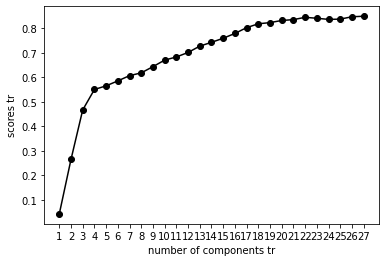

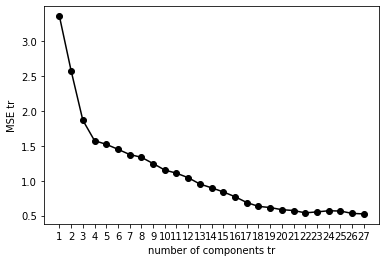

Number of components selected automatically:  27
     Number of components selected manually:  4
Auto model  TestSet    0.52013    0.42955    0.67314
Auto model TrainSet    0.00000    0.00000    0.00000
Auto model  FullSet    0.10277    0.28169    0.29973
Manual model  TestSet    0.53437    0.44263    0.69281
Manual model TrainSet    0.20684    0.17367    0.27008
Manual model  FullSet    0.27156    0.28270    0.39193


In [8]:
trname = "GMTr"
tename = "GMTe"
manualcomp = 4
cvlist = 10

mainrunpls (X, Y, trname, tename, manualcomp, cvlist, 27)

Running GRID model using cv =   5
   1 3.58161302 -0.02363189
   2 2.77863048 0.20586207
   3 2.03555326 0.41823496
   4 1.79267241 0.48765078
   5 1.65613613 0.52667311
   6 1.58083006 0.54819573
   7 1.44946080 0.58574132
   8 1.41683401 0.59506612
   9 1.34974708 0.61423969
  10 1.23062542 0.64828489
  11 1.18062028 0.66257645
  12 1.12005113 0.67988723
  13 1.01968600 0.70857178
  14 0.98101209 0.71962486
  15 0.90556118 0.74118887
  16 0.80175764 0.77085613
  17 0.72705674 0.79220579
  18 0.69007145 0.80277625
  19 0.69160040 0.80233928
  20 0.68139627 0.80525564
  21 0.64474041 0.81573195
  22 0.62558721 0.82120597
  23 0.62871658 0.82031159
  24 0.62824632 0.82044599
  25 0.61596713 0.82395541
  26 0.62637606 0.82098052
  27 0.59005894 0.83136002


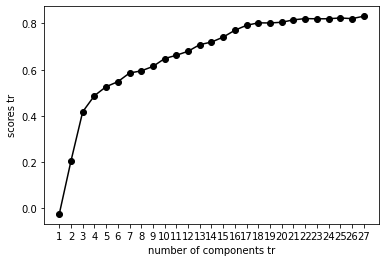

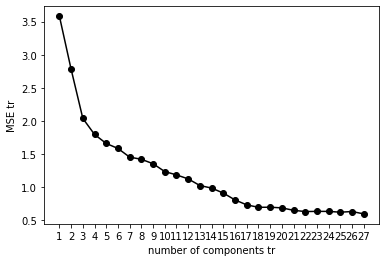

Number of components selected automatically:  27
     Number of components selected manually:  3
Auto model  TestSet    0.52013    0.42955    0.67314
Auto model TrainSet    0.00000    0.00000    0.00000
Auto model  FullSet    0.10277    0.28169    0.29973
Manual model  TestSet    0.55966    0.46096    0.72234
Manual model TrainSet    0.31852    0.25612    0.40872
Manual model  FullSet    0.36617    0.32224    0.48761


In [9]:
trname = "GMTr"
tename = "GMTe"
manualcomp = 3
cvlist = 5

mainrunpls (X, Y, trname, tename, manualcomp, cvlist, 27)